## Observations and Insights 

This is a great data to play with. However, some very important analysis is missing from the list of assignments. I added a sample analysis for the rate of shrinkage of a drug. A more elaborate analysis is necessary if one would like to make sense of the data. Here are a few observations based on the figures:

Figure 1,2: The number of available mice for each drug is roughly in between 150-250. Without looking at the standard deviation of a certain measure, the number of mice usually doesn't give much insight.

Figure 3,4: This is an important check for animal testing. The number of male and female is roughly equal in total, meaning that the scientist who took the data gives equal-distribution of male/female to remove the bias on sex as much as possible. A better analysis would be to check the male/female ratio for each drug regimen.

Figure 5: The boxplot of the final tumor volume shows that out of four of the chosen drug regimen, Capomulin and Ramicane shows qualitatively better tumor shrinkage then Infubinol and Ceftamin.

Figure 7,8: It wasn't explicit, so I put in the average final tumor volume. From an initial tumor volume, the data shows that as the mice is lighter, the effect of the drug Capomulin is greater. This is most likely due to equal amount of drug delivered to each mouse. Normally, as the mouse gets heavier, the amount of drug delivered must be larger. If the amount of drug delivered is the same for each case, this figure implicitly shows when the drug becomes effective in shrinking the tumor. For the amount of drug delivered, we see the effect for mice weighing less than 25g.




In [1]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy import stats as st
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single dataset
study_results_merged = study_results.merge(mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
display(study_results_merged)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
display(pd.DataFrame({
    "Number of Mice": len(study_results_merged["Mouse ID"].value_counts()),
    "Number of Drug Regimen": len(study_results_merged["Drug Regimen"].unique()),
    "Number of Timepoints": len(study_results_merged["Timepoint"].unique())}, 
    index=["Before Cleanup"]))

,Number of Mice,Number of Drug Regimen,Number of Timepoints
Before Cleanup,249,10,10


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
## .duplicated(keep=False) returns a mask for the given Series with all duplicated entries
duplicate_rows = study_results_merged[study_results_merged[["Mouse ID", "Timepoint"]].duplicated(keep=False)]
duplicate_mouse_ID = duplicate_rows["Mouse ID"].unique()

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
## Use .isin function to filter only for the duplicate mouse IDs
duplicate_mouseID_data = study_results_merged[study_results_merged["Mouse ID"].isin(duplicate_mouse_ID)]
display(duplicate_mouseID_data)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results_cleaned = study_results_merged.drop(duplicate_mouseID_data.index)

In [7]:
# Checking the number of mice in the clean DataFrame.
display(pd.DataFrame({
    "Number of Mice": len(study_results_cleaned["Mouse ID"].value_counts()),
    "Number of Drug Regimen": len(study_results_cleaned["Drug Regimen"].unique()),
    "Number of Timepoints": len(study_results_cleaned["Timepoint"].unique())}, 
    index=["After Cleanup"]))

,Number of Mice,Number of Drug Regimen,Number of Timepoints
After Cleanup,248,10,10


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
regimen_group = study_results_cleaned.groupby(by="Drug Regimen")
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
volume_mean = regimen_group["Tumor Volume (mm3)"].mean()
volume_median = regimen_group["Tumor Volume (mm3)"].median()
volume_var = regimen_group["Tumor Volume (mm3)"].var()
volume_std = regimen_group["Tumor Volume (mm3)"].std()
volume_sem = regimen_group["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
display(pd.DataFrame({
    "Mean Volume (mm3)": volume_mean, 
    "Median Volume (mm3)": volume_median,
    "variance Volume (mm6)": volume_var,
    "std-dev Volume (mm3)": volume_std,
    "std-err": volume_sem}))

,Mean Volume (mm3),Median Volume (mm3),variance Volume (mm6),std-dev Volume (mm3),std-err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
study_results_cleaned.groupby(by="Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


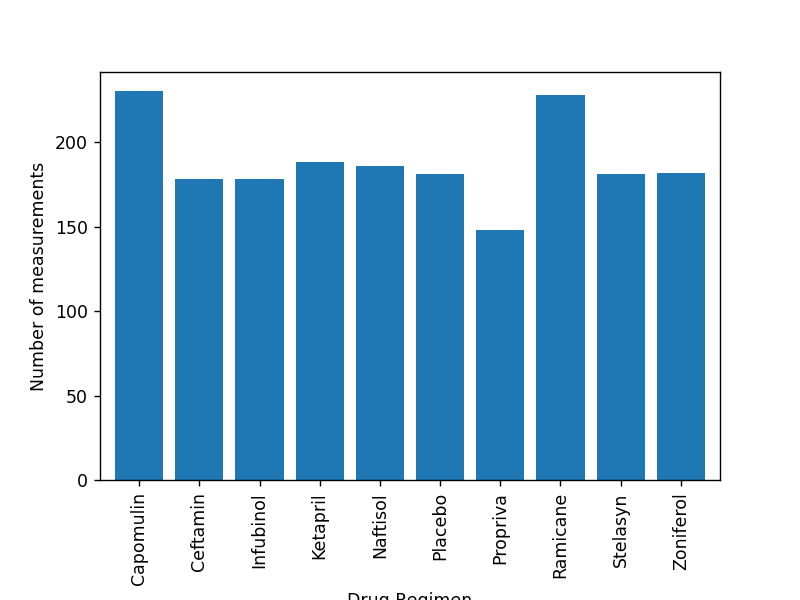

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
plt.figure(num=1)
regimen_group["Drug Regimen"].count().plot(kind="bar", ylabel="Number of measurements", width=0.8)
plt.subplots_adjust(bottom=0.2)

<IPython.core.display.Javascript object>


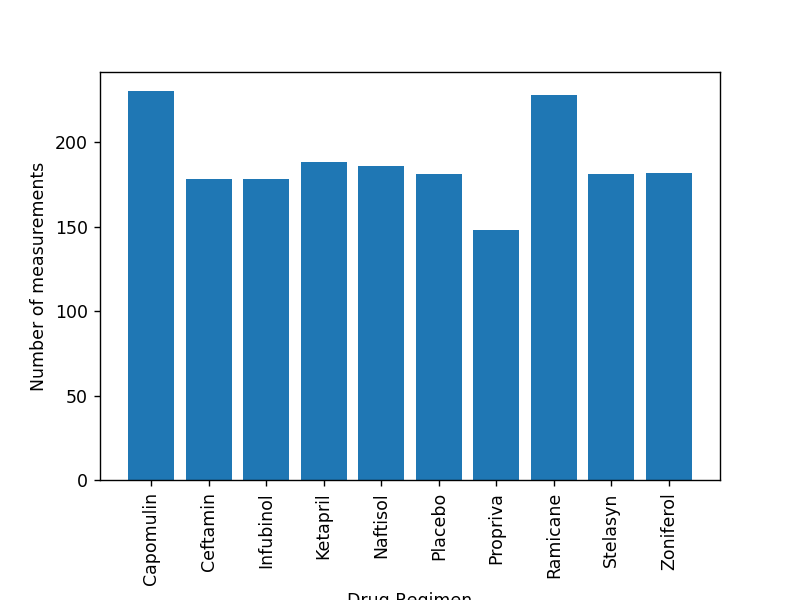

<ipython-input-11-d21f87e8c27e>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticks, rotation=90)


Text(0.5, 0, 'Drug Regimen')

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
xticks = regimen_group["Drug Regimen"].count().index
bar_height = regimen_group["Drug Regimen"].count().values

# Figure and axes
fig, ax = plt.subplots(1,1, num=2) 
fig.subplots_adjust(bottom=0.2)    # xtick labels are too long with default bottom value
ax.bar(xticks, bar_height, width=0.8)
ax.set_xticklabels(xticks, rotation=90)
ax.set_ylabel("Number of measurements")
ax.set_xlabel("Drug Regimen")

<IPython.core.display.Javascript object>


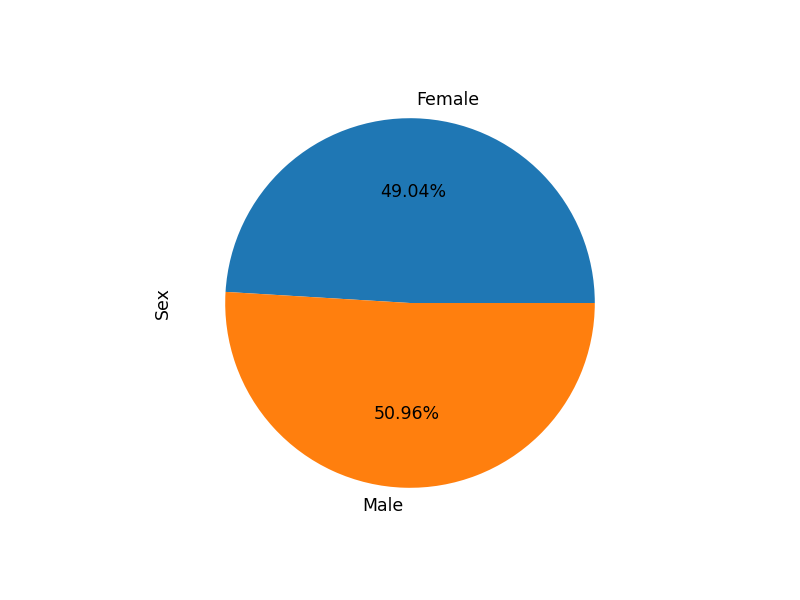

<AxesSubplot:ylabel='Sex'>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
plt.figure(num=3)
gender_group = study_results_cleaned.groupby(by="Sex")
gender_group["Sex"].count().plot(kind="pie", autopct="%.2f%%")


<IPython.core.display.Javascript object>


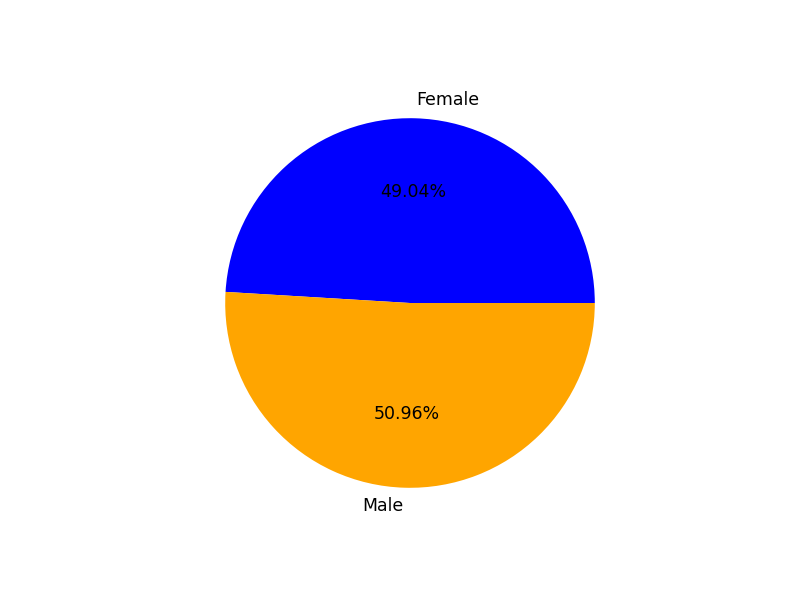

([<matplotlib.patches.Wedge at 0x2a77fe71df0>,
 [Text(0.03308201408261561, 1.0995024239828841, 'Female'),
  Text(-0.0330820140826155, -1.0995024239828841, 'Male')],
 [Text(0.018044734954153964, 0.5997285948997549, '49.04%'),
  Text(-0.018044734954153905, -0.5997285948997549, '50.96%')])

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_group["Sex"].count().keys()
counts = gender_group["Sex"].count().values
colors = ["blue", "orange"]

fig4, ax4 = plt.subplots(1,1)
ax4.pie(counts, labels=labels, colors=colors, 
       autopct="%.2f%%", startangle=0)


## Quartiles, Outliers and Boxplots

In [14]:
# Built on the function from https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib
def calculate_boxplot_data(labels, df_list):
    # values[i] is a list of dataframes corresponding to labels[i]
    rows_list = []
    
    for i in range(len(labels)):   # runs through each label item
        label = labels[i]
        df = df_list[i]
        
        # Write the quartiles
        quartiles = df.quantile([0.25, 0.5, 0.75])
        lower_quartile = quartiles[0.25]
        median = quartiles[0.5]
        upper_quartile = quartiles[0.75]
        iqr = upper_quartile-lower_quartile
        lower_bound = lower_quartile - (1.5*iqr)
        upper_bound = upper_quartile + (1.5*iqr)
        
        dict1 = {}
        dict1['label'] = label
        
        dict1['lower_bound'] = lower_bound
        dict1['lower_quartile'] = lower_quartile
        dict1['median'] = median
        dict1['upper_quartile'] = upper_quartile
        dict1['upper_bound'] = upper_bound
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
choose_drug = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Select the listed drugs from the dataframe
choose_drugs_df = study_results_cleaned[study_results_cleaned["Drug Regimen"].isin(choose_drug)]
# Select last timepoint from the filtered data
choose_drugs_last_tp_ser = choose_drugs_df.groupby("Mouse ID")["Timepoint"].max()


In [16]:
# Create a pandas dataframe with resetted indices
choose_drugs_last_tp_df = pd.DataFrame(choose_drugs_last_tp_ser).reset_index()
# Merge the newly created dataframe to the original dataframe
df_merged = choose_drugs_last_tp_df.merge(study_results_cleaned, how="inner", on=["Mouse ID", "Timepoint"])

volume_data_lst = []
for drug in choose_drug:
    # find indices for each measurement of the drug
    drug_idcs = df_merged["Drug Regimen"] == drug
    # select and append the found measurements into a list
    volume_data_lst.append(df_merged[drug_idcs]["Tumor Volume (mm3)"])

# Calculate quartiles
quartile_df = calculate_boxplot_data(choose_drug, volume_data_lst)

<IPython.core.display.Javascript object>


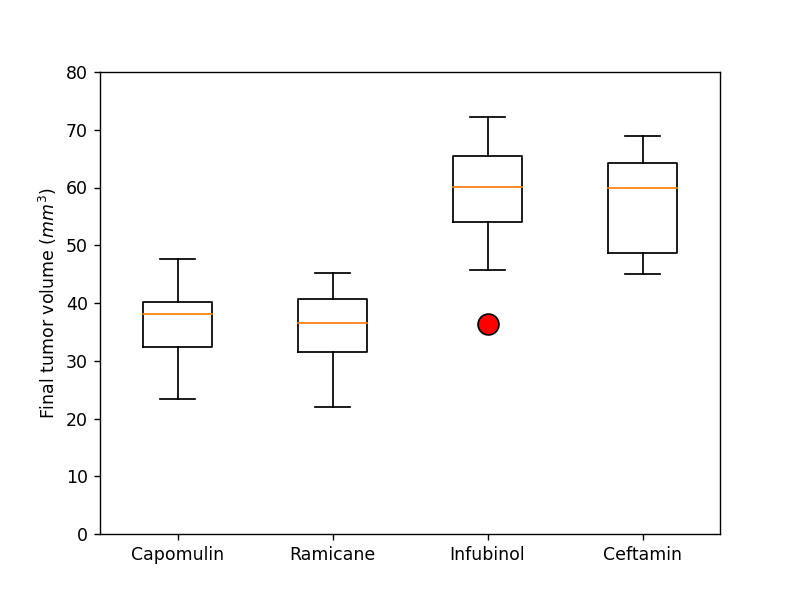

Text(0, 0.5, 'Final tumor volume $(mm^3)$')

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig5, ax5 = plt.subplots(1,1, num=5)
flierprops = dict(marker='o', markerfacecolor='red', markersize=12, linestyle='none')
_ = ax5.boxplot(volume_data_lst, labels=choose_drug, showfliers=True, flierprops=flierprops)
ax5.set_ylim(0,80)
ax5.set_ylabel(r"Final tumor volume $(mm^3)$")

## Line and Scatter Plots

<IPython.core.display.Javascript object>


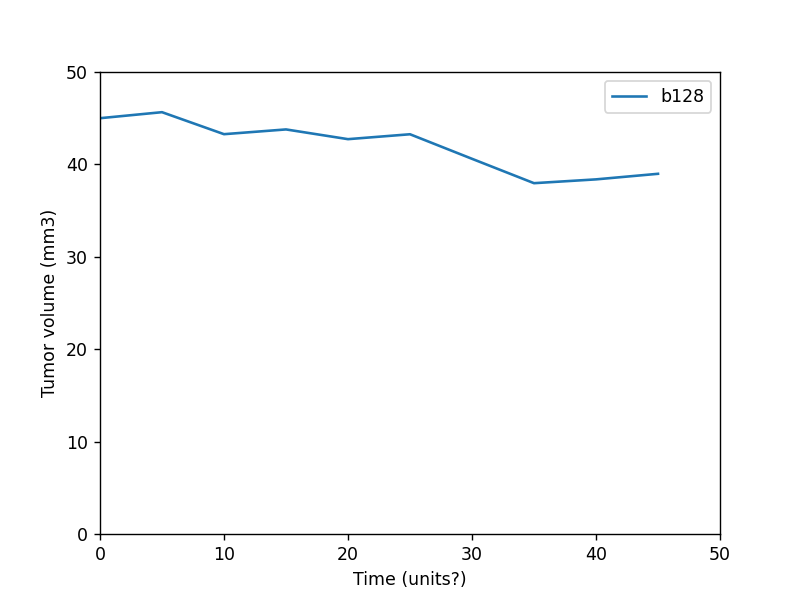

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_id = "b128"
mouse_df = study_results_cleaned[study_results_cleaned["Mouse ID"] == mouse_id]
ax = mouse_df.plot("Timepoint", "Tumor Volume (mm3)",
              kind="line", legend=mouse_id,
              xlabel="Time (units?)", ylabel="Tumor volume (mm3)",
              xlim=(0,50), ylim=(0,50), label=mouse_id)


<IPython.core.display.Javascript object>


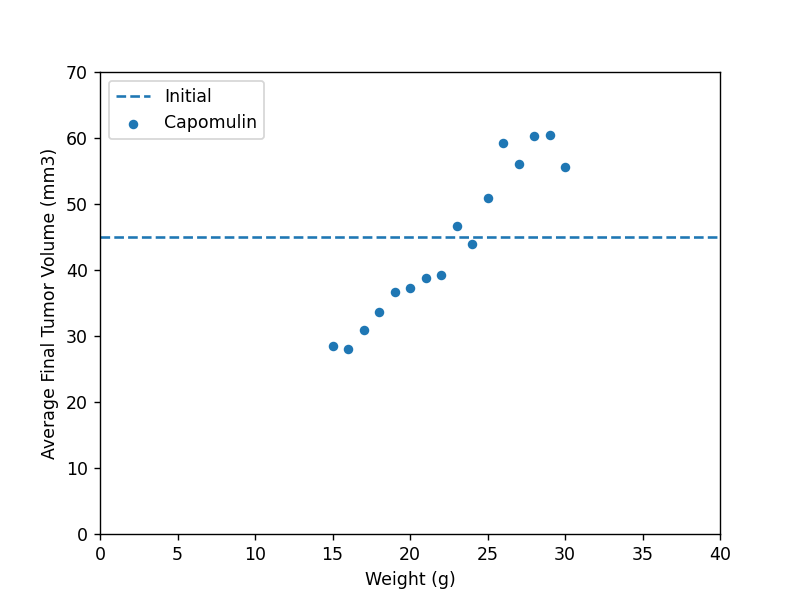

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_group = study_results_cleaned.groupby("Weight (g)")

weight_tumor_df = pd.DataFrame(df_merged.groupby("Weight (g)").mean())\
                    .reset_index()\
                    .rename(columns={"Tumor Volume (mm3)": "Average Final Tumor Volume (mm3)"})
ax = weight_tumor_df.plot("Weight (g)", "Average Final Tumor Volume (mm3)",
                          kind="scatter", label = "Capomulin",
                          xlim=(0,40), ylim=(0,70))

# Add the initial tumor volume as a horizontal line
ax.plot([0,40], [45,45], '--', label="Initial")
ax.legend(loc="upper left")

## Correlation and Regression

In [20]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = \
                    st.linregress(weight_tumor_df["Weight (g)"],
                                  weight_tumor_df["Average Final Tumor Volume (mm3)"])
print("Correlation coefficient for mouse weight vs average tumor volume is %.4f" % (rvalue))
print("The linear-regression model is:")
print("x: Mouse weight in grams")
print("y: Average tumor volume in mm3")

print("y=%.2fx + %.2f" % (slope, intercept))

Correlation coefficient for mouse weight vs average tumor volume is 0.9649
The linear-regression model is:
x: Mouse weight in grams
y: Average tumor volume in mm3
y=2.36x + -8.91


<IPython.core.display.Javascript object>


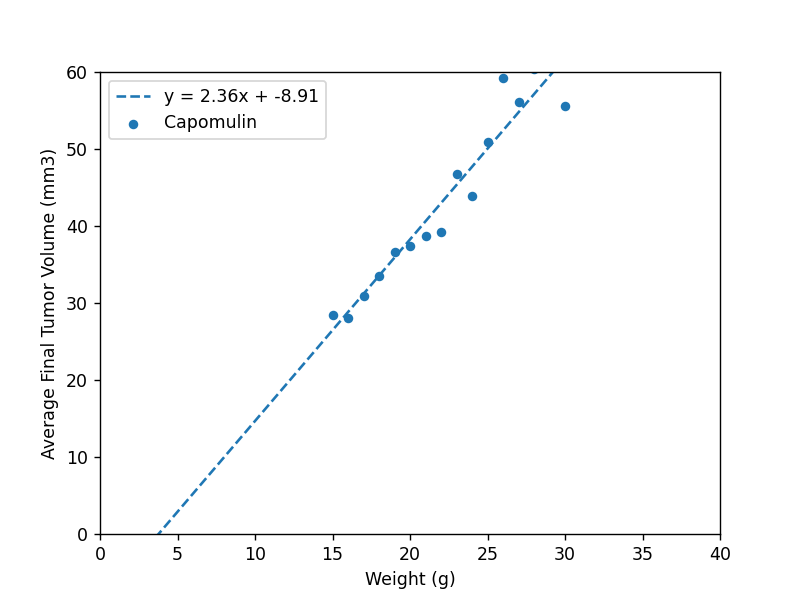

In [21]:
# Plot the linear regression model on top of the scatter plot

# x,y-values 
xvals = np.arange(0,40)
yvals = slope*xvals + intercept

# Plot
ax = weight_tumor_df.plot("Weight (g)", "Average Final Tumor Volume (mm3)",
                          kind="scatter", label = "Capomulin",
                          xlim=(0,40), ylim=(0,60))
ax.plot(xvals, yvals, "--", label="y = %.2fx + %.2f" % (slope, intercept))
ax.legend()

## More analysis
- Normally, the scientist looks at each drug regimen and mouse, and calculates the effect of drug on the tumor by fitting a linear regression model to the time vs volume. Then, a better IQR analysis could be through the slopes of the regression. In the interest of time, here I present this for each mouse on Capomulin.
- A more important result is that each drug regimen must be compared to the placebo as a control variable

<IPython.core.display.Javascript object>


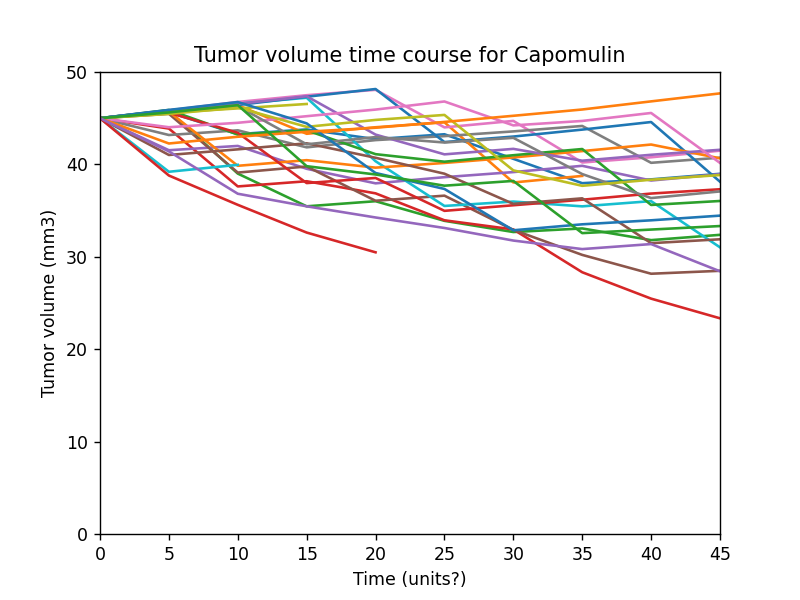

In [22]:
# Plot Capomulin data and obtain linregress model for each 
capomulin_df = study_results_cleaned[study_results_cleaned["Drug Regimen"] == "Capomulin"]

fig, ax = plt.subplots(1,1)

capomulin_mice = capomulin_df["Mouse ID"].unique()
model_slope = []
for mouse_id in capomulin_mice:
    mouse_df = capomulin_df[capomulin_df["Mouse ID"] == mouse_id]
    mouse_df.plot("Timepoint", "Tumor Volume (mm3)", ax=ax,
              kind="line", legend=False,
              xlabel="Time (units?)", ylabel="Tumor volume (mm3)",
              xlim=(0,45), ylim=(0,50))
    
    # Calculate the linregress model:
    (slope, intercept, rvalue, pvalue, stderr) = \
                                    st.linregress(mouse_df["Timepoint"],
                                    mouse_df["Tumor Volume (mm3)"])
    model_slope.append(slope)
    
ax.set_title("Tumor volume time course for Capomulin")
# Pandas dataframe for the model
capomulin_dict = {}
capomulin_dict["Mouse ID"] = capomulin_mice

capomulin_model = pd.DataFrame({"Mouse ID": capomulin_mice,
                                "Slope": model_slope})

<IPython.core.display.Javascript object>


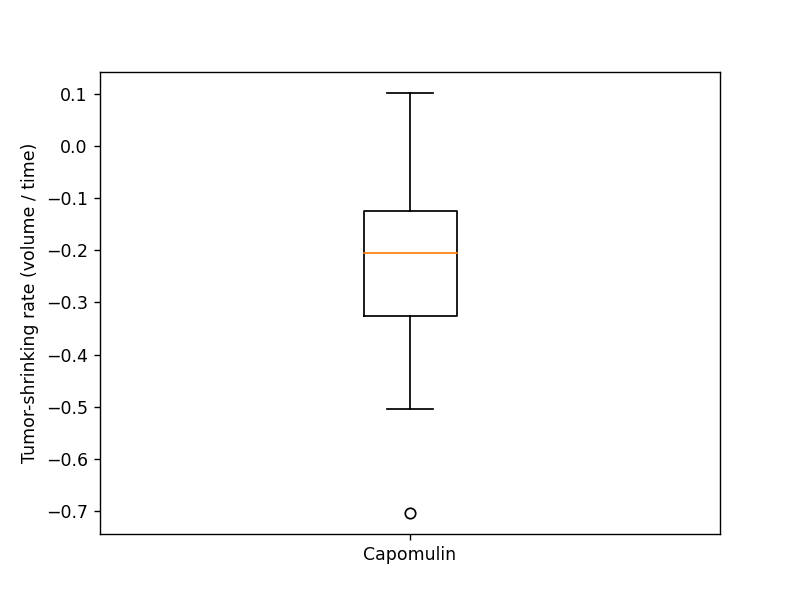

Text(0, 0.5, 'Tumor-shrinking rate (volume / time)')

In [23]:
fig, ax = plt.subplots(1,1)
ax.boxplot(capomulin_model["Slope"], labels=["Capomulin"])
ax.set_ylabel("Tumor-shrinking rate (volume / time)")